In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import string
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from sklearn import decomposition
from sklearn.metrics import roc_auc_score

from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/saketh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/saketh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/saketh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/saketh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [4]:
categories = os.listdir('Data')

file_content_list = []

for category in categories:
    directory = f"./Data/{category}/"
    files = os.listdir(directory)
    for file_name in files:
        content = open(directory + file_name, encoding="utf8").read()
        row = [file_name, content, category]
        file_content_list.append(row)


file_content_df = pd.DataFrame(file_content_list, columns=['file_name', 'content', 'category'])
print(file_content_df.head())
corpus = []
for text in file_content_df['content'].to_numpy().tolist():
    text_without_punctuation = ''.join([ch for ch in text if ch not in string.punctuation])
    corpus.append(text_without_punctuation.lower())

pipe = Pipeline([('count', CountVectorizer(tokenizer = LemmaTokenizer())),
                ('tfid', TfidfTransformer())]).fit(corpus)
# pipe['count'].transform(corpus).toarray()
data = pipe.transform(corpus).toarray()
pca = decomposition.PCA(n_components=50)
pca.fit(data)
pca_data = pca.transform(data)

# df['category'] = fileContentDf['category']
# print(df.head())
# print(df.shape)


          file_name                                            content  \
0    business_1.txt  Lufthansa flies back to profit\n\nGerman airli...   
1   business_10.txt  Winn-Dixie files for bankruptcy\n\nUS supermar...   
2  business_100.txt  US economy still growing says Fed\n\nMost area...   
3   business_11.txt  Saab to build Cadillacs in Sweden\n\nGeneral M...   
4   business_12.txt  Bank voted 8-1 for no rate change\n\nThe decis...   

   category  
0  business  
1  business  
2  business  
3  business  
4  business  


In [5]:
y = file_content_df['category'].to_numpy()
train_x, test_x, train_y, test_y = train_test_split(pca_data, y, random_state=42)
train_df = pd.DataFrame(train_x)


train_df['category'] = train_y


test_df = pd.DataFrame(test_x)
test_df['category'] = test_y
# print(test_df.columns)

test_df = test_df.drop(['category'], axis=1)

print(train_df.shape)
print(test_df.shape)

print(train_df['category'].value_counts())
# print(test_df['category'].value_counts())

# print(train_df.head())
# print(test_df.head())

print(train_df.columns)
train_df.swapaxes("index", "columns")
print(test_df.columns)



(750, 51)
(250, 50)
space            84
entertainment    83
historical       82
sport            73
graphics         73
technologie      72
politics         72
business         71
medical          71
food             69
Name: category, dtype: int64
Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,         35,
               36,         37,         38,         39,         40,         41,
               42,         43,         44,         45,         46,         47,
               48,         49, 'category'],
      dtype='object')
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11

In [6]:
train_df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,category
0,0.039134,-0.001010,-0.046749,-0.000874,0.110835,-0.033231,-0.037180,-0.064189,0.109382,-0.031832,...,0.014246,-0.043190,-0.043933,0.007018,-0.015559,0.000199,-0.012227,-0.030712,0.033141,business
1,-0.030578,-0.051675,-0.007592,0.082319,0.065100,0.046110,-0.050779,0.026762,-0.014852,-0.011372,...,-0.006698,0.011167,0.033929,-0.033463,-0.059428,-0.029388,-0.007930,-0.022069,-0.002287,technologie
2,-0.032513,0.011243,0.069039,0.014192,0.036600,0.004282,-0.091121,0.050221,-0.118402,-0.127799,...,-0.004335,-0.043388,-0.021474,-0.040910,-0.000446,-0.045292,-0.029235,-0.000413,0.017292,space
3,-0.018645,-0.090369,-0.102473,-0.144494,-0.140357,0.002319,-0.007268,-0.070144,-0.032840,-0.017990,...,0.027577,-0.062127,-0.048121,0.024613,0.012719,-0.076022,-0.050383,0.031830,0.000020,sport
4,0.071042,-0.005264,0.031925,0.004499,-0.002582,0.011650,-0.045168,0.021010,-0.027933,-0.037062,...,-0.071865,0.143704,0.004215,0.060796,-0.005835,0.131758,-0.014838,-0.019017,0.159025,graphics


In [7]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.073365,-0.134967,0.095051,0.026115,-0.087544,-0.027701,-0.048262,0.010542,-0.080892,0.047928,...,0.013282,0.016449,-0.045516,0.021243,-0.076872,-0.064256,-0.003355,-0.009386,0.059168,0.081062
1,0.181245,-0.038077,0.026276,0.001234,-0.002702,-0.063813,-0.021163,0.058886,-0.027256,-0.065124,...,0.074447,0.050276,-0.064297,0.003259,0.054095,0.083229,0.018191,0.071684,-0.018452,0.028165
2,0.091255,-0.064455,0.036273,0.058973,0.008379,-0.011453,-0.003576,-0.005972,0.016647,0.026908,...,-0.032951,-0.033518,-0.012872,-0.001563,-0.004551,-0.000178,0.003923,0.023605,-0.004803,0.035620
3,-0.067382,-0.047565,-0.119906,0.143065,-0.037892,-0.061504,0.143073,0.019210,0.031093,-0.027792,...,-0.080166,-0.021148,-0.049287,0.009005,-0.009716,-0.015415,-0.049004,-0.009126,-0.050762,0.004057
4,-0.140896,0.164015,0.069516,-0.089926,0.008406,-0.042129,0.009013,0.010463,0.014525,-0.086466,...,-0.010037,-0.022191,0.046080,-0.001784,-0.017633,-0.037122,-0.031836,0.021073,-0.000740,-0.027888


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

In [9]:
ypred=gnb.predict(test_x)
ypred

array(['medical', 'space', 'space', 'politics', 'historical', 'politics',
       'politics', 'medical', 'sport', 'entertainment', 'sport',
       'business', 'politics', 'technologie', 'business', 'food', 'food',
       'sport', 'space', 'graphics', 'medical', 'entertainment',
       'graphics', 'medical', 'food', 'food', 'entertainment',
       'technologie', 'technologie', 'graphics', 'graphics', 'business',
       'politics', 'historical', 'graphics', 'entertainment', 'politics',
       'medical', 'technologie', 'sport', 'graphics', 'business',
       'graphics', 'technologie', 'food', 'food', 'technologie',
       'politics', 'historical', 'sport', 'medical', 'sport', 'food',
       'medical', 'politics', 'business', 'politics', 'business', 'food',
       'sport', 'food', 'business', 'medical', 'food', 'politics',
       'space', 'politics', 'sport', 'graphics', 'space', 'entertainment',
       'historical', 'medical', 'space', 'food', 'food', 'politics',
       'business', 'medica

In [10]:
ypredprob=gnb.predict_proba(test_x)
ypredprob

array([[2.99771644e-26, 3.60088330e-17, 7.26118728e-11, ...,
        8.97628750e-08, 1.07187658e-21, 1.83439325e-09],
       [1.81454639e-19, 1.83261329e-18, 4.83358090e-11, ...,
        9.99997919e-01, 2.16595225e-16, 1.99377096e-10],
       [2.64371205e-07, 3.77580591e-09, 2.66692536e-04, ...,
        8.57892474e-01, 1.36116462e-07, 4.42547044e-02],
       ...,
       [1.00000000e+00, 6.29841245e-15, 9.95762018e-33, ...,
        1.12290651e-27, 7.51341305e-19, 2.64335540e-14],
       [9.99999999e-01, 8.35815023e-12, 1.35455824e-16, ...,
        1.70196919e-16, 1.92398919e-18, 5.97576502e-10],
       [1.40385078e-50, 1.98468311e-35, 1.00000000e+00, ...,
        2.45062302e-11, 7.03572431e-34, 5.23978579e-32]])

In [11]:
test_y

array(['medical', 'space', 'space', 'politics', 'historical', 'politics',
       'politics', 'medical', 'sport', 'entertainment', 'sport',
       'business', 'politics', 'technologie', 'technologie', 'sport',
       'food', 'sport', 'space', 'graphics', 'medical', 'entertainment',
       'graphics', 'medical', 'food', 'food', 'entertainment',
       'technologie', 'technologie', 'technologie', 'graphics',
       'entertainment', 'politics', 'historical', 'graphics',
       'entertainment', 'politics', 'medical', 'technologie', 'business',
       'graphics', 'business', 'graphics', 'technologie', 'food', 'food',
       'technologie', 'politics', 'historical', 'sport', 'medical',
       'sport', 'food', 'medical', 'business', 'business', 'politics',
       'business', 'food', 'sport', 'food', 'business', 'medical', 'food',
       'politics', 'politics', 'politics', 'sport', 'business', 'medical',
       'entertainment', 'historical', 'medical', 'space', 'food', 'food',
       'politics',

In [12]:
crect=0
for pred,act in zip(ypred,test_y):
    if pred == act:
        crect+=1
print(crect/250)

0.908


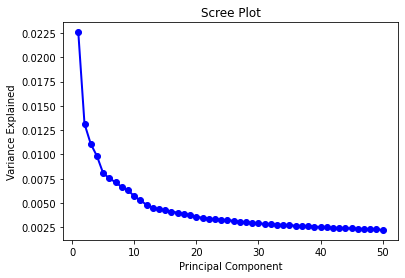

In [13]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [14]:
test_content = open('./test_file.txt').read()
test_content = [test_content]
test_data = pipe.transform(test_content)
pca_test_data = pca.transform(test_data.toarray())
print(pca_test_data)

[[-0.01142396 -0.11904664 -0.04252323 -0.12921472 -0.17646032 -0.05098566
   0.05932184 -0.0896595  -0.05292749 -0.01594145 -0.00464309 -0.11631818
  -0.03224768  0.04524969 -0.00616468 -0.00169068 -0.06591356 -0.08421275
   0.04881176 -0.02036457  0.01035501 -0.01157038  0.01293382 -0.01852506
  -0.01227506 -0.04075676 -0.01202388  0.05084936 -0.05761829 -0.01487073
   0.03893953 -0.01167494 -0.0099119   0.01135525 -0.00027271 -0.0204578
  -0.03734253 -0.04136415  0.0019638  -0.0036581   0.00382538 -0.0133784
   0.02165087 -0.0445945   0.00129653 -0.00352132 -0.0235084   0.0013293
  -0.01782753 -0.00600618]]


In [15]:
gnb.predict(pca_test_data)

array(['sport'], dtype='<U13')

In [16]:
gnb.predict_proba(pca_test_data)

array([[1.14550648e-20, 1.43283808e-09, 4.07997207e-12, 6.53842074e-07,
        1.61758266e-12, 1.41209879e-11, 5.72462682e-11, 9.80747178e-12,
        9.99999345e-01, 4.75126816e-15]])

In [17]:
import pickle

with open('pipe', 'wb') as pipe_file:
    pickle.dump(pipe, pipe_file)

with open('pca', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

with open('model', 'wb') as model_file:
    pickle.dump(gnb, model_file)